In [8]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sales = pd.read_csv('./data/Advertising Budget and Sales.csv', index_col=0)

In [7]:
shap.initjs() # shap 시각화를 위해서 실행함.

In [9]:
sales

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [10]:
y = sales['Sales ($)'] # target
X = sales.drop('Sales ($)', axis=1) # features

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [51]:
X_train

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
71,199.1,30.6,38.7
155,187.8,21.1,9.5
195,149.7,35.6,6.0
34,265.6,20.0,0.3
105,238.2,34.3,5.3
...,...,...,...
127,7.8,38.9,50.6
170,284.3,10.6,6.4
165,117.2,14.7,5.4
130,59.6,12.0,43.1


In [15]:
rfr = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=5)

In [17]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=12345)

In [20]:
explainer = shap.TreeExplainer(rfr) # 결정트리 기반이므로 treeexplainer 사용, 보통 kernalexplainer 사용.

In [24]:
shap_train = explainer.shap_values(X_train)
shap_train # X_train의 shap value들

array([[ 2.97346876e+00,  1.48583281e+00, -2.43251811e-02],
       [ 2.33700742e+00, -1.09042881e+00,  4.93302387e-03],
       [ 1.01015727e+00,  2.24669492e+00, -2.34836437e-02],
       [ 3.83068391e+00, -1.38029138e+00,  5.96835865e-02],
       [ 4.06915395e+00,  1.92065875e+00, -2.39267000e-02],
       [ 4.55796850e+00,  3.95198412e+00, -9.02220757e-03],
       [ 2.99346136e+00, -7.33986875e-01, -1.95618838e-02],
       [-8.69951853e+00,  7.81041759e-01, -9.92419807e-02],
       [ 4.06616562e+00,  1.16627381e+00, -2.34334880e-02],
       [-1.93763400e+00, -2.48810356e+00, -9.24164106e-02],
       [-3.13030382e+00, -2.16247146e+00, -5.93674439e-02],
       [ 8.34482166e-01, -4.37867592e+00, -2.03521189e-02],
       [ 7.67457624e-01,  8.18661175e-02,  6.93530129e-03],
       [ 3.59358953e+00,  1.78030587e+00,  6.40988808e-02],
       [ 1.66989519e+00, -3.19802243e+00,  3.68455344e-02],
       [ 4.77114285e+00,  1.28294272e+00,  4.29503585e-03],
       [ 1.13709806e+00, -3.95846100e-01

In [26]:
shap_test = explainer.shap_values(X_test)
shap_test # X_test의 shap value

array([[ 3.98676655e+00,  3.79382181e+00, -2.26592084e-02],
       [ 7.32144040e-01, -4.42221825e+00, -3.42397771e-02],
       [-5.79486100e+00,  2.55290643e+00, -9.93905557e-02],
       [-2.41979626e+00, -8.22492400e-01, -6.79546490e-02],
       [-8.42201392e+00,  6.79400613e-01, -1.29982986e-02],
       [ 1.56012301e+00,  1.80468759e+00,  6.61362011e-02],
       [ 4.36112203e+00,  1.32415254e+00, -3.25259612e-02],
       [ 2.13147246e+00, -4.24760590e+00, -2.23433940e-02],
       [ 5.09535168e+00,  3.55833055e+00,  5.82158026e-02],
       [ 3.49675284e+00,  4.93079973e+00,  8.44137308e-02],
       [ 4.56608234e-01, -4.07984354e+00, -2.02994606e-02],
       [ 3.75065124e+00,  1.24504758e+00,  4.00154555e-02],
       [-3.37241018e+00, -2.17048605e+00, -7.01501775e-02],
       [-9.03974954e+00,  1.56611054e+00, -3.99726101e-02],
       [ 2.39660836e-01, -2.89403344e+00, -3.27710054e-02],
       [ 2.83506877e+00, -5.74884424e+00, -2.58138637e-02],
       [ 5.37789944e+00,  4.34470085e+00

In [31]:
shap_train_df = pd.DataFrame(shap_train, columns=['TV', 'Radio', 'Newspaper'], index=X_train.index)
shap_train_df

,TV,Radio,Newspaper
71,2.973469,1.485833,-0.024325
155,2.337007,-1.090429,0.004933
195,1.010157,2.246695,-0.023484
34,3.830684,-1.380291,0.059684
105,4.069154,1.920659,-0.023927
...,...,...,...
127,-9.069347,1.626590,0.159979
170,3.678638,-2.947616,0.023393
165,-0.945626,-1.020619,-0.021903
130,-3.248007,-1.271715,-0.058937


In [32]:
shap_test_df = pd.DataFrame(shap_test, columns=['TV', 'Radio', 'Newspaper'], index=X_test.index)
shap_test_df

,TV,Radio,Newspaper
53,3.986767,3.793822,-0.022659
158,0.732144,-4.422218,-0.034240
136,-5.794861,2.552906,-0.099391
141,-2.419796,-0.822492,-0.067955
57,-8.422014,0.679401,-0.012998
96,1.560123,1.804688,0.066136
55,4.361122,1.324153,-0.032526
51,2.131472,-4.247606,-0.022343
18,5.095352,3.558331,0.058216
56,3.496753,4.930800,0.084414


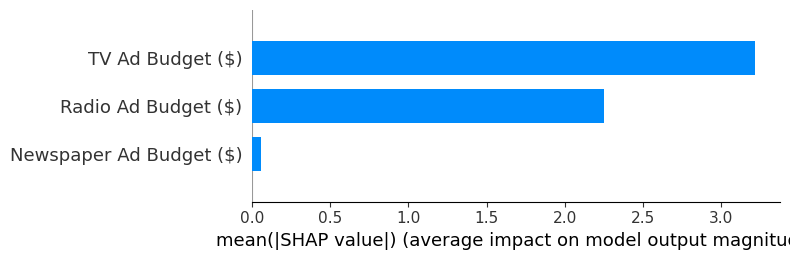

In [34]:
shap.summary_plot(shap_train, X_train, plot_type='bar') # 피쳐의 영향력(절댓값) (feature importance와 한없이 비슷한 값.)

<Axes: ylabel='None'>

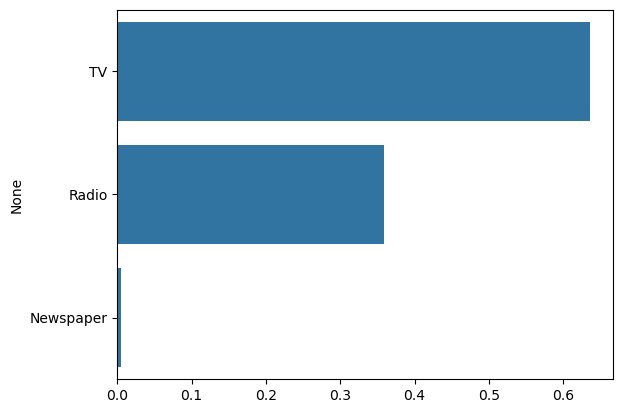

In [35]:
sns.barplot(x=rfr.feature_importances_, y=shap_train_df.columns) # shap value 그래프와 양상이 거의 같기 때문에 shap value가 feature importance를 대신할 수 있음.

### SHAP Summary Plot
- Y축 (피처명): 모델 예측에 가장 중요한 피처가 상위에 위치하며, 덜 중요한 피처는 하단에 위치합니다.
- X축 (SHAP 값): 각 피처가 예측에 미치는 영향을 나타내며, 값이 클수록 영향이 큽니다.
- 색상 (피처 값): 점의 색깔은 해당 피처의 실제 값을 나타냅니다. 보통 빨간색은 값이 높음을, 파란색은 값이 낮음을 나타냅니다.
- 점의 분포: 피처의 값이 예측에 미치는 영향을 시각적으로 표현하며, 넓게 퍼져 있을수록 예측에 미치는 영향이 다양하다는 것을 의미합니다.

이 SHAP summary plot을 통해 모델이 각 피처를 어떻게 이용하는지에 대해 보다 직관적으로 이해할 수 있습니다. 머신러닝 모델의 해석 가능성을 높이는 데 매우 유용한 도구입니다.

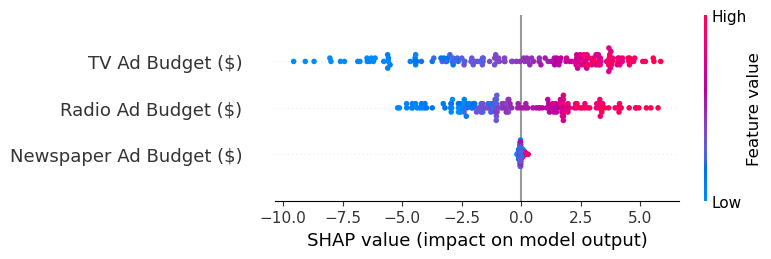

In [36]:
shap.summary_plot(shap_train, X_train)


아래 그래프들을 보면 feature value가 높을수록 기울기가 높다.

<Axes: xlabel='TV Ad Budget ($)', ylabel='Sales ($)'>

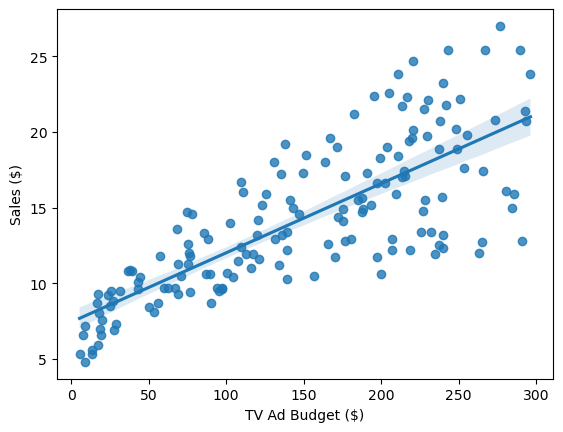

In [39]:
sns.regplot(x=X_train['TV Ad Budget ($)'], y=y_train)

<Axes: xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

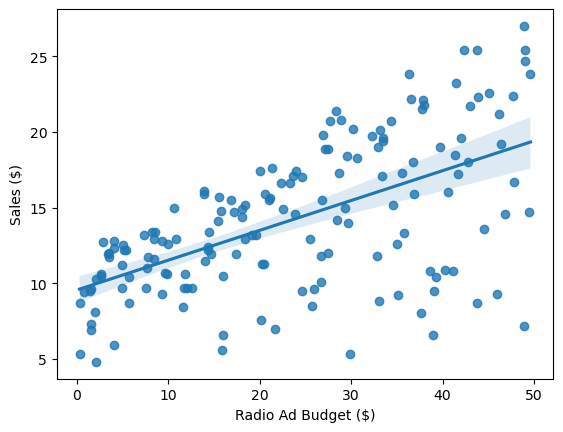

In [40]:
sns.regplot(x=X_train['Radio Ad Budget ($)'], y=y_train)

<Axes: xlabel='Newspaper Ad Budget ($)', ylabel='Sales ($)'>

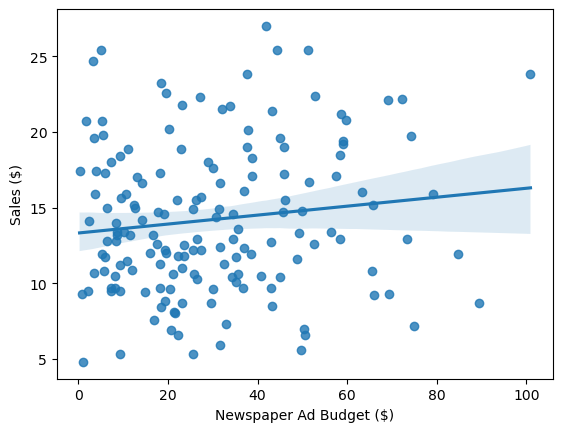

In [41]:
sns.regplot(x=X_train['Newspaper Ad Budget ($)'], y=y_train)

위에서 세 그래프의 lineplot의 오차 범위를 비교하면, 아래로 갈 수록 넓어지는데, 그것은 p-value를 의미하고, summary_plot에서 색상 차이가 극명하게 날수록 p-value가 낮다.

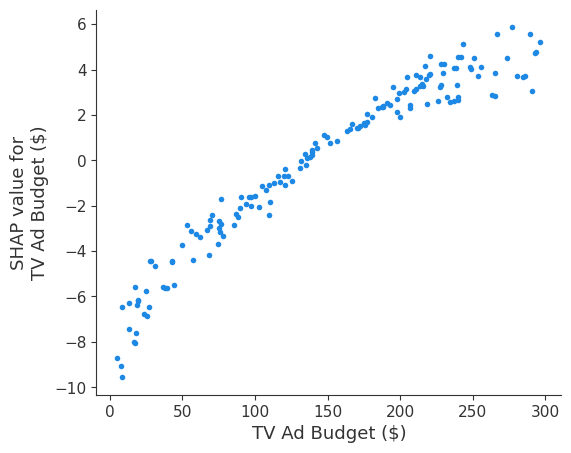

In [42]:
shap.dependence_plot('TV Ad Budget ($)', shap_train, X_train, interaction_index=None)
# tv 광고 예산의 효율을 나타낸다. 여기서는 로그함수 형태인데, 
# 갈수록 기울기가 줄어드는 모습을 보이므로, 
# 접선의 기울기가 가장 높을 때가 효율이 가장 높은 것으로 볼 수 있다.

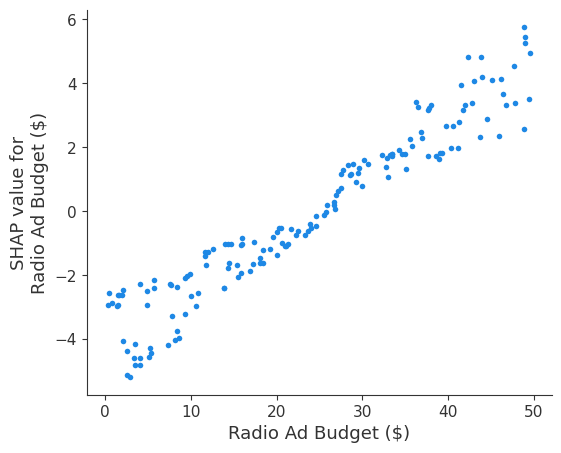

In [44]:
shap.dependence_plot('Radio Ad Budget ($)', shap_train, X_train, interaction_index=None)
# 그래프를 보면, 라디오 예산을 늘리는 것이 Tv 예산을 늘리는 것 보다 효율이 좋다. (기울기 계산)

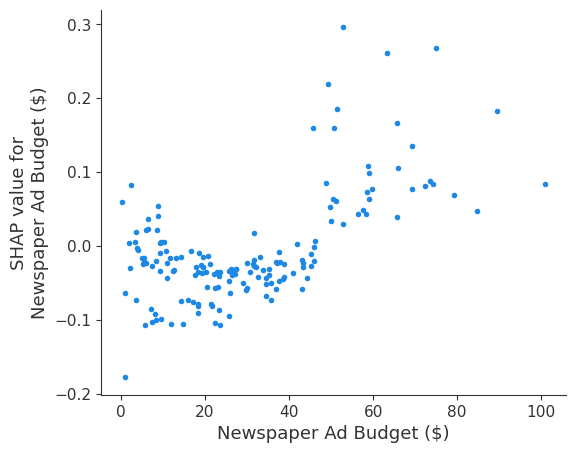

In [43]:
shap.dependence_plot('Newspaper Ad Budget ($)', shap_train, X_train, interaction_index=None)
# 투자 안하는것보단 낫지만, shap value가 아주 낮아서 투자 효율이 매우 낮다.

In [46]:
interaction  = explainer.shap_interaction_values(X_train) # 피쳐 사이의 관계, 상호작용을 나타냄

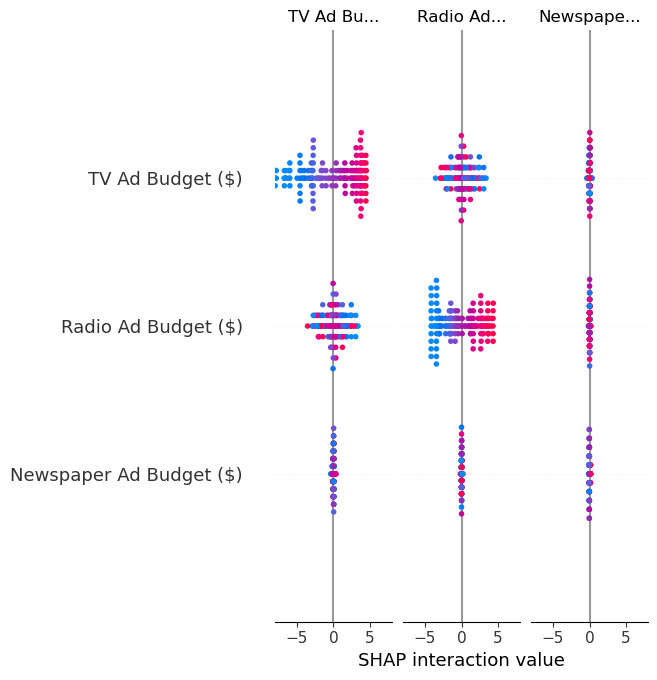

In [50]:
shap.summary_plot(interaction, X_train)
# 같은 것 끼리는 색이 골고루 잘 퍼져 있다. 만약 다른 피쳐끼리 이런 그래프가 나오면, 그건 공선성이 있다고 볼 수 있다.


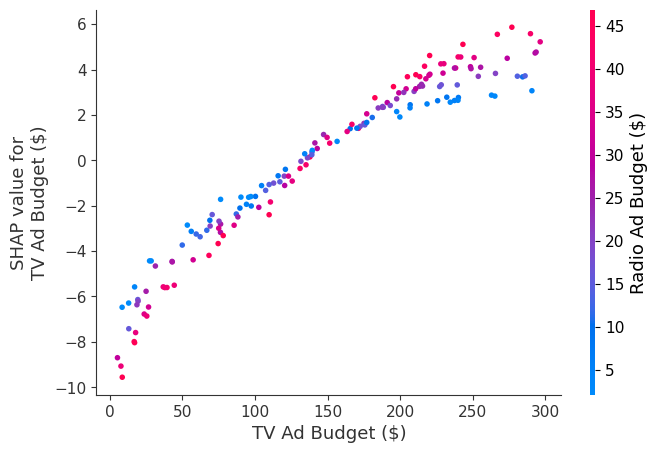

In [54]:
shap.dependence_plot('TV Ad Budget ($)', shap_train, X_train, interaction_index='Radio Ad Budget ($)')
# radio ad budget이 높으면 TV ad budget 효율이 늘어난다.
# 150달러 이하에서는 라디오가 낮으면 tv가 높고, 150달러 이상부터는 높으면 높다.

In [64]:
import xgboost # 트리 기반 부스트 모델

In [65]:
X, y = shap.datasets.california() # 캘리포니아 부동산 데이터

In [66]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
xgb = xgboost.XGBRegressor()

In [68]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
explainer = shap.Explainer(xgb)

In [71]:
shap_values = explainer(X)

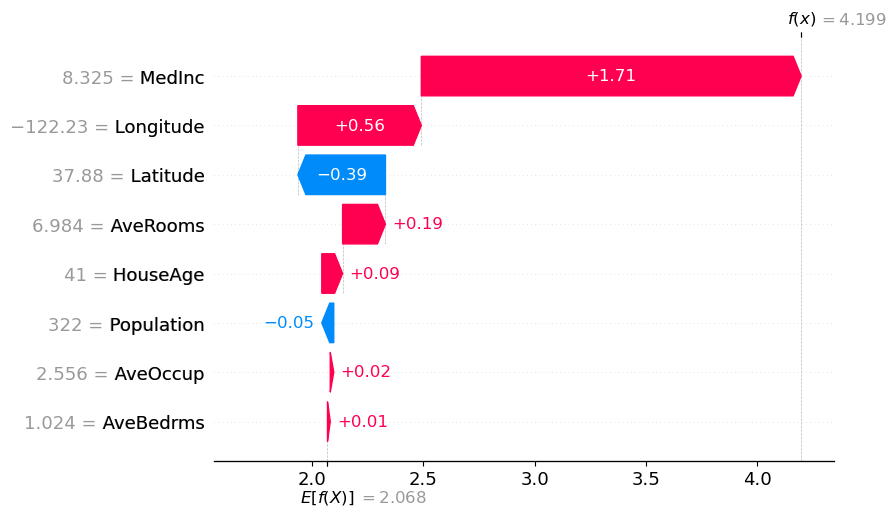

In [72]:
shap.waterfall_plot(shap_values[0])

맨 아래부터 시작해서 'return 평균 f(x) = 4.199'가 만들어질 때 피쳐들이 각각 어떤 영향을 어느 방향으로 끼쳤는지 보여주는 그래프이다.
워터폴플롯은 글로벌 분석이다. 모델에 대해서 모든 샘플에 대해서 보여준다.

In [74]:
shap.force_plot(shap_values[:500])

위의 포스플롯은 로컬 분석이다. 한 샘플의 영향도에 대해서만 보여준다.

In [90]:
shap.force_plot(explainer.expected_value, shap_train[1], features=X_train.iloc[1], feature_names=X_train.columns)

Tv ad Budget은 양의 방향으로 187, Radio ad budget은 -21.1만큼 영향을 주었다. 막대의 꺾쇠방향이 영향의 부호(방향)를 나타냄.
두 영역의 영향이 합쳐져 3.32라는 값을 만들어 냄.

In [88]:
X_train

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
71,199.1,30.6,38.7
155,187.8,21.1,9.5
195,149.7,35.6,6.0
34,265.6,20.0,0.3
105,238.2,34.3,5.3
...,...,...,...
127,7.8,38.9,50.6
170,284.3,10.6,6.4
165,117.2,14.7,5.4
130,59.6,12.0,43.1


In [91]:
shap.force_plot(explainer.expected_value, shap_train[-5], features=X_train.iloc[-5], feature_names=X_train.columns)

여기서는 Tv Ad Budget이 아주 적었으므로, 음의 방향으로 영향을 많이 주어서 값이 -5.21이 나온 것이다.
라디오는 38.9였음에도 영향을 별로 못 준 것이다.

옆에 빨간색 막대에 조그마하게 있는 영역이 신문 광고 예산이다.

LIME, Feature Importance, Permutation Importance
LIME : 엑셀용 라이브러리. shap와 비슷함. 어떤 모델에선 되고 어떤데는 안됨.
Feature Importance : 간단해서 간단한 분석에는 딸깍해서 쓸 수 있음.

shap 장점
Feature engineering 할때 증거자료 활용 가능.


단점 : 느림